<h1 style="padding-top: 25px;padding-bottom: 25px;text-align: left; padding-left: 10px; background-color: #DDDDDD; 
    color: black;"> <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2021-s109a/blob/master/lectures/crest.png?raw=true"> CS S109A: Introduction to Data Science </h1>

## Homework 1: Data Collection - Web Scraping - Data Parsing

**Harvard University**<br/>
**Summer 2021**<br/>
**Instructor**: Kevin Rader



<hr style='height:2px'>

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

<div class='exercise'><b>Instructions</b></div>
- To submit your assignment follow the instructions given in Canvas.
- The deliverables to be submitted in Canvas are: <br/>
    a) this python notebook with your code and answers<br/>
    b) the bibtex file, `publist.bib`, you created<br/>
    c) the CSV file, `publist.csv`, you created <br/>
    d) The JSON file, `publist.json` you created<br/>
    
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of several seconds between requests in your code. This helps to prevent you from getting blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.



# Data Collection - Web Scraping - Data Parsing 
 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you will read the data from a file, and then later scrape them directly from a website. You will look for specific pieces of information by parsing the data, clean the data to prepare them for analysis, and finally, answer some questions.

In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML.
- JavaScript Object Notation (JSON), a text-based open standard designed for transmitting structured data over the web.

In [2]:
# import the necessary libraries
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
%matplotlib inline

## Help a professor parse their publications and extract information.

### Overview

In this part your goal is to parse the HTML page of a professor containing some of his/her publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 45 publications in descending order from No. 244 to No. 200.


In [3]:
# use this file 
PUB_FILEPATH = 'data/publist_super_clean.html'

<div class='exercise'><b> Question 1 [35 pts]: Parsing and Converting to bibTex and CSV using Beautiful Soup and python string manipulation </b></div>

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which looks roughly like this (we've simplified a few things):
```
@article { 
     author = "John Doyle",
     title = "Interaction between atoms",
     URL = "Papers/PhysRevB_81_085406_2010.pdf",
     journal = "Phys. Rev. B",
     volume = "81"
}
```
You will notice that this file format is a set of items, each of which is a set of key-value pairs. In the python world, you can think of this as a list of dictionaries.
Each line is an item, and has multiple features, or keys, as represented by that line's value for the column corresponding to the key.

You are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex and .CSV formats. A useful tool for parsing HTML is BeautifulSoup  (http://www.crummy.com/software/BeautifulSoup/) (BS).

**1.1 [5 pts]** Write a function called `make_soup` that accepts `filename` for the HTML filename as an input and returns a BS object.
    
**1.2 [20 pts]** Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should cerrespond to one paper and should have the following format (with different values for each publication):
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```


**1.3 [5 pts]** Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.

**1.4 [5 pts]** Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index.

    
#### HINT 
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper.  BeautifulSoup's `find_all` method might be useful.
- Question 1.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper. 
- Question 1.3 is effectively tackled by first using python string formatting on a template string.
- Make sure you catch exceptions when needed. 
- Make sure you check for **missing data** and handle these cases as you see fit. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>
    
### Answers 

In [4]:
# import the necessary libraries 
from bs4 import BeautifulSoup

 **1.1** Write a function called `make_soup` that accepts as input a string representing the path to an HTML file and returns a BS object.
    

In [5]:
def make_soup(file_path: str) -> BeautifulSoup: 
    '''Open the file and convert into a BS object. 
       
       Args:
           file_path: (str) path to an HTML file
       
       Returns:
           A BS object containing the HTML page ready to be parsed.
    '''
    with open(file_path, 'r') as f:
        contents = f.read()
        return BeautifulSoup(contents, "html.parser")

In [6]:
# check your code - print the BS object returned by `make_soup()`
# you should get a familiar HTML page as text (please enable scrolling on the output)
soup = make_soup(PUB_FILEPATH)
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efth

Your output should look **like** this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

**1.2** Write a function that reads in the BS object, parses it, and converts it into a list of dictionaries.  Each element of this list should correspond to one paper and should have the following format (with different values for each publication):
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': 'Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```

In [7]:
articles_list = []
articles = soup.body.find_all('li')
for article in articles:
    article_dict = {}
    article_dict['author'] = article.find('br').next_sibling.strip()[:-1]
    # Adding the commented out line of code would remove the newlines from the tilte and make it nicer to read
    article_dict['title'] = article.find('a').text.strip()[1:-1]#.replace('\n', ' ').replace('\r', '')
    article_dict['URL'] = article.find('a').attrs['href']
    article_dict['journal'] = article.find('i').text.strip()
    article_dict['volume'] = article.find('b').text.strip() if article.find('b') != None else None
    articles_list.append(article_dict)

In [8]:
articles_list

[{'author': 'Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng',
  'title': 'Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons',
  'URL': 'Papers/2011/PhysRevB_84_125411_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '84'},
 {'author': 'JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng',
  'title': 'Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles',
  'URL': 'Papers/2011/PhysRevB_84_035325_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '84'},
 {'author': 'Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras',
  'title': 'Influence of CH2 content and network defects on the elastic properties of organosilicate glasses',
  'URL': 'Papers/2011/PhysRevB_83_054204_2011.pdf',
  'journal': 'PHYSICAL REVIEW B',
  'volume': '83'},
 {'author': 'Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali',
  'title': 'Direct correlat

**1.3** Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.


In [9]:
# your code here
with open("publist.bib", "w") as f:
    for article in articles_list:
        f.write('@article {\n')
        for key in article:
            f.write(f'\t{key} = "{article[key]}"\n')
        f.write('}\n')

In [10]:
# check your answer - print the bibTex file
# clear/remove output before making pdf
with open('publist.bib', 'r') as f:
    print(f.read())

@article {
	author = "Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng"
	title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
	URL = "Papers/2011/PhysRevB_84_125411_2011.pdf"
	journal = "PHYSICAL REVIEW B"
	volume = "84"
}
@article {
	author = "JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng"
	title = "Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"
	URL = "Papers/2011/PhysRevB_84_035325_2011.pdf"
	journal = "PHYSICAL REVIEW B"
	volume = "84"
}
@article {
	author = "Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras"
	title = "Influence of CH2 content and network defects on the elastic properties of organosilicate glasses"
	URL = "Papers/2011/PhysRevB_83_054204_2011.pdf"
	journal = "PHYSICAL REVIEW B"
	volume = "83"
}
@article {
	author = "Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali"
	title = "Direct correlation

**1.4** Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index.

In [11]:
# your code here
df = pd.DataFrame(articles_list)
df.to_csv('publist.csv',index = False, header = True)

## Follow the stars in IMDb's list of "The Top 100 Stars for 2020" 

### Overview
In this part, your goal is to extract information from IMDb's Top 100 Stars for 2020 (https://www.imdb.com/list/ls045252306/) and perform some analysis on each star in the list. In particular we are interested to know: 
+ how many performers made their first acting appearance after turning 25? 
+ how many performers started as child actors? (i.e., strictly younger than 12)
+ who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2020? 

These questions are addressed in more details in the questions below. 



<div class='exercise'><b> Question 2 [65 pts]: Web Scraping using Beautiful Soup and exploring using Pandas </b></div>

**2.1 [5 pts]** Download the webpage of the "Top 100 Stars for 2020" (https://www.imdb.com/list/ls082599715/) into a `requests` object and name it `my_page`. Explain what the following attributes are (1 or 2 sentences for each):

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**2.2 [5 pts]** Create a Beautiful Soup object named `star_soup` using `my_page` as input.

**2.3 [15 pts]** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). The order of dictionaries does not matter. One of the fields of this dictionary is the `url` of each star's individual page, which you need to save in the `page` field. Note that there is a ton of information about each star on these webpages. Each dictionary corresponds to a star profile and it should have the following data:

```
name: the name of the actor/actress as it appears at the top
gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
url: the url of the link under their name that leads to a page with details
page: BS object with html text acquired by scraping the above 'url' page' 
```


**2.4 [20 pts]** Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.

   
**2.6 [6 pts]** We provide a JSON file called `data/staff_starinfo_2020.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_appearance`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.

**2.7 [4 pts]** You are now ready to answer the following intriguing questions: 
- **2.7.1** How many performers made their first appearance (movie or TV) when they were 25 years old or older?

- **2.7.2** How many performers started as child actors? Define child actor as a person strictly younger than 12 years old. 

**2.8 [6 pts]** Use your Python visualization skills to further explore the data:
- **2.8.1** Create 2 scatter plots: one showing the relationship between age at first appearance and number of credits, the other between year born and number of credits. What can you say about these relationships? Are there any apparent outliers? Please limit your written responses to 4 sentences or fewer.
- **2.8.2** Create 2 histograms in a single plot comparing the distribution of actors' current ages to actresses' current ages. What does this visualization tell you? (4 sentences or fewer)
- **2.8.3** Create a box plot comparing the credits-per-year-active for actors and actresses. Here we assume all stars in the list are still active. Do these distributions look the same across genders? Comment on anything else of interest gleaned from your plot. (4 sentences or fewer)

**2.9 [2 pts]** Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2020? Define **most prolific** as the performer with the most credits.
    
**2.10 [2 pts]** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.
     
### Hints
- You should include acting appearances in both movies and TV shows.
- Create a variable that groups actors/actresses by the age of their first appearance. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply operations to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year may have some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these in a reasonable fashion before performing calculations on the data. 
- Rita Aryu was born in 1993.
- Be careful of some actors/actresses listings as producers.  We only want their acting appearances.
- Christopher Nolan is mainly a writer and has never acted.  Be careful handling him (you should 'impute' the year of his first movie appearance as 2021).
    
### Resources
- The `requests` library makes working with HTTP requests easy. For more on the `requests` library see http://docs.python-requests.org/

### Answers

In [12]:
import requests
import re # you may use regexes but they are not required

**2.1** Download the webpage of the "Top 100 Stars for 2020" (https://www.imdb.com/list/ls082599715/) into a `requests` object and name it `my_page`. Explain what the following attributes are:

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.


In [13]:
# your code here
my_page = requests.get('https://www.imdb.com/list/ls082599715/')

print("The status code is", my_page.status_code)
print("The content is", my_page.content)
print("The text is", my_page.text)

The status code is 200
The content is b'\n\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///list/ls082599715?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Top 100 Stars of 2020 - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n

`my_page.text` gives the contents of the response (the HTML page) in unicode. This makes this output somewhat readable to humans and it is easier for us to scrape text off of this.


`my_page.status_code` tells us whether the server has successfully answered the HTTP request or not. A status code of 200 means success.


`my_page.content` gives the contents of the response in bytes. Because this is binary data it is very unreadable to humans but it becomes important when we are trying to scrape off images.




**2.2** Create a Beautiful Soup object named `star_soup` using `my_page` as input.


In [14]:
# your code here
star_soup = BeautifulSoup(my_page.text, "html.parser")

In [15]:
# check your code - you should see familiar HTML code
print (star_soup.prettify()[:])


<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls082599715?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2020 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {w

**2.3** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below)....

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: BS object with 'html text acquired by scraping the above 'url' page' 

```

In [16]:
def parse_stars(star_soup):
    star_list = []
    stars = star_soup.find('div', attrs={'class':'lister-list'}).findAll('div', attrs={'class':'lister-item'})
    for star in stars:
        star_dict = {}
        
        star_dict['name'] = star.find('h3').find('a').text.strip()
        
        # as per the given instructions, we simply cast 'Actress' and 'Actor' to 1 and 0
        # respectively. However, we did realize that there are professions like 'Director'
        # and 'Producer' in the list. We cast those genders as 'None' but an afterthought was
        # to look at the pronouns used in their bio to figure out the gender. But it is 
        # impossible to guarantee that a pronoun used in the bio indeed refers to the person
        # at hand (it might be used to refer to their father/mother, etc) so we stuck to our 
        # decision of casting it to 'None' rather than risking inputting wrong values.
        gender_type = star.find('p').text.split(' |\n')[0].strip()
        if gender_type == 'Actress':
            star_dict['gender'] = 1
        elif gender_type == 'Actor':
            star_dict['gender'] = 0
        else:
            star_dict['gender'] = None
            
        star_dict['url'] = 'https://www.imdb.com' + star.find('h3').find('a').attrs['href']
        r = requests.get(star_dict['url']) 
        star_dict['page'] = BeautifulSoup(r.text, "html.parser")
        
        star_list.append(star_dict)
    return star_list

starlist = parse_stars(star_soup)

This should give you 100

In [17]:
len(starlist)

100

In [18]:
# check your code
# this list is large because of the html in the `page` field
# to get a better picture, print only the first element
starlist[0]

{'name': 'Ana de Armas',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm1869101',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm1869101?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Ana de Armas - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>
 <script>
     if (

Your output should look like this:
```
{'name': 'Ana de Armas',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm1869101',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm1869101?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Ana de Armas - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
... 


 ```

**2.4** Write a function called `create_star_table`, which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_appearance: title of their first movie or TV show
    year_first_appearance: the year they made their first movie or TV show
    credits: number of movies or TV shows they have acted in in their career.
    
```

In [19]:
# your code here
def create_star_table(star_list):
    new_star_list = []
    for star in star_list:
        new_star_dict = {}
        
        new_star_dict['star_name'] = star['name']
        new_star_dict['gender'] = star['gender']
        
        year_div = star['page'].find('div', attrs = {'id': 'name-born-info'})
        new_star_dict['year_born'] = year_div.find('time').find_all('a')[-1].text if year_div != None else None
        
        works_list_div = star['page'].find('div', attrs = {'id': 'filmography'})
        
        works_title_list = works_list_div.find('div', attrs = {'class': 'filmo-category-section'}).find_all('b')
        new_star_dict['first_appearance'] = works_title_list[-1].text
        
        works_year_list = works_list_div.find('div', attrs = {'class': 'filmo-category-section'}).find_all('span', attrs = {'class': 'year_column'})
        new_star_dict['year_first_appearance'] = works_year_list[-1].text.strip()[:4]
        
        new_star_dict['credits'] = works_list_div.find('div').find('a').next_sibling.strip()[1:-9]
        
        new_star_list.append(new_star_dict)
        
    return new_star_list


In [20]:
# DO NOT RERUN THE HTTP REQUESTS TO IMDb WHEN SUBMITTING - THIS WILL TAKE SOME TIME
star_table = create_star_table(starlist)

In [21]:
# check your code
star_table

[{'star_name': 'Ana de Armas',
  'gender': 1,
  'year_born': '1988',
  'first_appearance': 'Una rosa de Francia',
  'year_first_appearance': '2006',
  'credits': '31'},
 {'star_name': 'Julia Garner',
  'gender': 1,
  'year_born': '1994',
  'first_appearance': 'The Dreamer',
  'year_first_appearance': '2010',
  'credits': '31'},
 {'star_name': 'Anya Chalotra',
  'gender': 1,
  'year_born': '1996',
  'first_appearance': 'Wanderlust',
  'year_first_appearance': '2018',
  'credits': '6'},
 {'star_name': 'Millie Bobby Brown',
  'gender': 1,
  'year_born': '2004',
  'first_appearance': 'Once Upon a Time in Wonderland',
  'year_first_appearance': '2013',
  'credits': '17'},
 {'star_name': 'Erin Moriarty',
  'gender': 1,
  'year_born': '1994',
  'first_appearance': 'One Life to Live',
  'year_first_appearance': '2010',
  'credits': '24'},
 {'star_name': 'Margot Robbie',
  'gender': 1,
  'year_born': '1990',
  'first_appearance': 'City Homicide',
  'year_first_appearance': '2008',
  'credits': 

Your output should look like this (the order of elements is not important):
```
[{'name': 'Ana de Armas',
  'gender': 1,
  'year_born': '1988',
  'first_appearance': 'Una rosa de Francia',
  'year_first_appearance': '2006',
  'credits': '31'},
 {'name': 'Julia Garner',
  'gender': 1,
  'year_born': '1994',
  'first_appearance': 'The Dreamer',
  'year_first_appearance': '2010',
  'credits': '31'},
    ...
```

**2.5** Now that you have scraped all the info you need, it's good practice to save the last data structure you created to disk. Save the data structure to a JSON file named `starinfo.json` and submit this JSON file in Canvas. If you do this, if you have to restart, you won't need to redo all the requests and parsings from before.


In [22]:
import json # investivate the `dump` method

In [23]:
# your code here
with open('starinfo.json', 'w') as f:
    json.dump(star_table, f)

To check your JSON saving, re-open the JSON file and reload the code

In [24]:
with open("starinfo.json", "r") as fd:
    star_table = json.load(fd)
    
# output should be the same
star_table

[{'star_name': 'Ana de Armas',
  'gender': 1,
  'year_born': '1988',
  'first_appearance': 'Una rosa de Francia',
  'year_first_appearance': '2006',
  'credits': '31'},
 {'star_name': 'Julia Garner',
  'gender': 1,
  'year_born': '1994',
  'first_appearance': 'The Dreamer',
  'year_first_appearance': '2010',
  'credits': '31'},
 {'star_name': 'Anya Chalotra',
  'gender': 1,
  'year_born': '1996',
  'first_appearance': 'Wanderlust',
  'year_first_appearance': '2018',
  'credits': '6'},
 {'star_name': 'Millie Bobby Brown',
  'gender': 1,
  'year_born': '2004',
  'first_appearance': 'Once Upon a Time in Wonderland',
  'year_first_appearance': '2013',
  'credits': '17'},
 {'star_name': 'Erin Moriarty',
  'gender': 1,
  'year_born': '1994',
  'first_appearance': 'One Life to Live',
  'year_first_appearance': '2010',
  'credits': '24'},
 {'star_name': 'Margot Robbie',
  'gender': 1,
  'year_born': '1990',
  'first_appearance': 'City Homicide',
  'year_first_appearance': '2008',
  'credits': 

**2.6** We provide a JSON file called `data/staff_starinfo_2020.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_appearance`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.

In [25]:
with open("data/staff_starinfo_2020.json", "r") as fd:
    frame = pd.DataFrame(json.load(fd))
    
frame.dtypes

credits              int64
first_movie         object
gender               int64
name                object
year_born           object
year_first_movie    object
dtype: object

In [26]:
# convert `year_born` and `year_first_movie` to int64
frame.year_born = frame.year_born.astype(int)
frame.year_first_movie = frame.year_first_movie.astype(int)

In [27]:
frame['age_at_first_appearance'] = frame['year_first_movie'] - frame['year_born']
frame

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_appearance
0,31,Una rosa de Francia,1,Ana de Armas,1988,2006,18
1,31,The Dreamer,1,Julia Garner,1994,2010,16
2,6,Wanderlust,1,Anya Chalotra,1996,2018,22
3,16,Once Upon a Time in Wonderland,1,Millie Bobby Brown,2004,2013,9
4,24,One Life to Live,1,Erin Moriarty,1994,2010,16
5,40,City Homicide,1,Margot Robbie,1990,2008,18
6,8,Modern Family,0,Aidan Gallagher,2003,2013,10
7,29,Vampire Academy,1,Anya Taylor-Joy,1996,2014,18
8,67,Bone Chillers,1,Linda Cardellini,1975,1996,21
9,27,Vendetta,0,Henry Cavill,1983,2001,18


In [28]:
# your code here
np.sum(frame.isnull())

credits                    0
first_movie                1
gender                     0
name                       0
year_born                  0
year_first_movie           0
age_at_first_appearance    0
dtype: int64

In [29]:
frame[frame.first_movie.isnull()]

,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_appearance
56,0,None,0,Christopher Nolan,1970,2021,51


In the new dataframe we created, we noticed that Christopher Nolan doesn't have a `first_movie` and the `year_first_movie` is set to 2021. This is not accurate and it doesn't give us the correct `age_at_first_appearance` for him.

**2.7** You are now ready to answer the following intriguing questions:
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 25 years old or older?
- **2.7.2** How many performers started as child actors? Define child actor as a person strictly younger than 12 years old. 


In [30]:
# your code here
print("The number of performers who made their first appearance (movie or TV) when he/she was 25 years old or older :", len(frame[frame.age_at_first_appearance >= 25]))

The number of performers who made their first appearance (movie or TV) when he/she was 25 years old or older : 9


In [31]:
# your code here
print("The number of child actors :", len(frame[frame.age_at_first_appearance < 12]))

The number of child actors : 17


**2.8** Use your Python visualization skills to further explore the data:
- **2.8.1** Create 2 scatter plots: one showing the relationship between age at first appearance and number of credits, the other between year born and number of credits. What can you say about these relationships? Are there any apparent outliers? Please limit your written responses to 4 sentences or fewer.
- **2.8.2** Create 2 histograms in a single plot comparing the distribution of actors' current ages to actresses' current ages. What does this visualization tell you? (4 sentences or fewer)
- **2.8.3** Create a box plot comparing the credits-per-year-active for actors and actresses. Here we assume all stars in the list are still active. Do these distributions look the same across genders? Comment on anything else of interest gleaned from your plot (4 sentences or fewer).

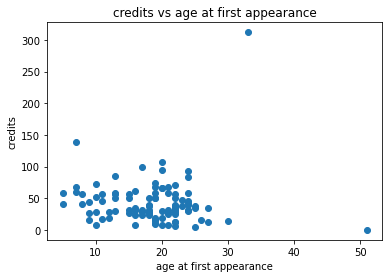

In [32]:
# 2.8.1
plt.scatter(frame.age_at_first_appearance, frame.credits)
plt.xlabel("age at first appearance")
plt.ylabel("credits")
plt.title("credits vs age at first appearance");

Increasing the age of first appearance does not significantly increase or decrease the number of credits, so there is no clear relationship between the two variables. This result is actually surprising since people who start off at an early age can be usually hypothesized to have more credits but this data says otherwise. There are 3 apparent outliers in the plot - a successful actor/actress who started early, a very successful actor/actress who made their debut in their early 30s and a person who made a late debut resulting in less credits to their name.

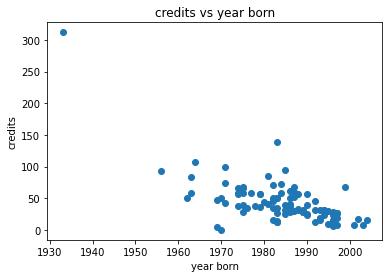

In [33]:
plt.scatter(frame.year_born, frame.credits)
plt.xlabel("year born")
plt.ylabel("credits")
plt.title("credits vs year born");

When we increase the year born, the credits appear to decrease, indicating an inverse relationship between the two variables. The result is expected, because the earlier an actor/actress is born, the more time they have to obtain credits and hence the more credits they are likely to have. In contrast, young actors (with recent birth dates) have just begun to earn credits and have not had enough time to accumulate more credits yet given their young age. There are no clear outliers other than a few actors/actresses born in 1970 with a low number of credits and the one actor/actress born just past 1980 with 150 credits - the  one actor/actress born just past 1930 with over 300 credits is indeed far away from the rest of the group in terms of birth date, but the number of credits matches the inverse relationship we have observed so the point is not necessarily an outlier.

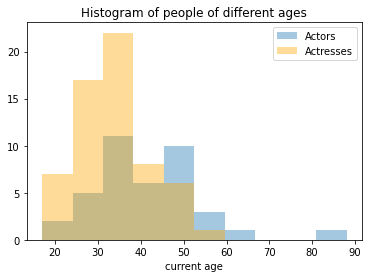

In [34]:
# 2.8.2
current_actor_ages = 2021 - frame[frame.gender == 0].year_born
current_actress_ages = 2021 - frame[frame.gender == 1].year_born
# https://stackoverflow.com/questions/23617129/matplotlib-how-to-make-two-histograms-have-the-same-bin-width
# used the following line of code to get the same bin widths for the two histograms
bins=np.histogram(np.hstack((current_actor_ages,current_actress_ages)), bins=10)[1] #get the bin edges
plt.hist(current_actor_ages, alpha=0.4, label='Actors', bins=bins);
plt.hist(current_actress_ages, color='orange', alpha=0.4, label='Actresses', bins=bins);
plt.xlabel("current age")
plt.title("Histogram of people of different ages")
plt.legend();

We see that most current actresses are between the narrow interval of ages 20 to 40, while current actors' ages are more widely distributed and are mostly within the wider interval of ages 20 to 60. There are more actresses than actors so we cannot say much about the height of the distributions, only the spread of the distributions. We also observe that there are no actresses in the list above the age of 60 while there are a few actors over 60, even past the age of 80.

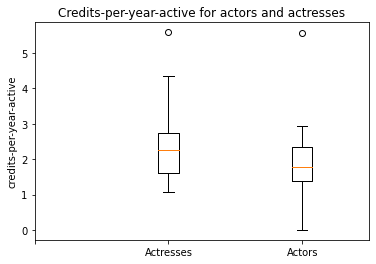

In [35]:
# 2.8.3
# We are assuming that the number of active years is inclusive of 2021
def active_years(frame):
    return 2022 - frame.year_first_movie;

actor_avg_credits = frame[frame.gender == 0].credits / active_years(frame[frame.gender == 0])
actress_avg_credits = frame[frame.gender == 1].credits / active_years(frame[frame.gender == 1])
plt.boxplot([actress_avg_credits, actor_avg_credits]);
x_labels = ('', 'Actresses','Actors')
plt.ylabel("credits-per-year-active")
x_pos = np.arange(len(x_labels))
plt.xticks(x_pos,x_labels);
plt.title("Credits-per-year-active for actors and actresses");

The middle 50 percent of credits-per-year-active for actors and actresses are relatively similar, with the distribution of credits across genders roughly centered at 2 credits. However, the endpoint extremes for actresses are higher than those of the actors (high extreme is over 4 for actresses and roughly 3 for actors, while the low extreme is roughly 1 for actresses and essentially 0 for actors). It tells us a story of actresses being generally more active in the performance category than actors.

**2.9** Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2020? Define **most prolific** as the performer with the most credits. 

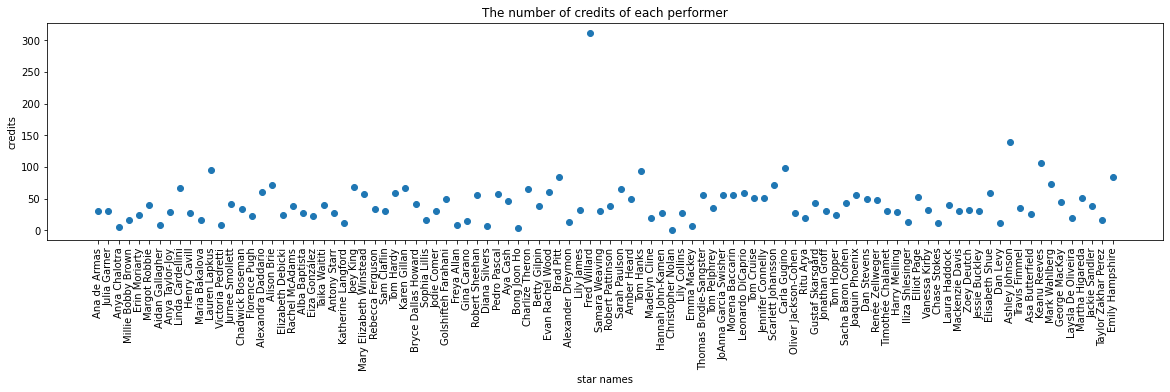

In [36]:
# your code here
f = plt.figure()
f.set_figwidth(20)
plt.scatter(frame.name, frame.credits);
plt.xticks(rotation=90);
plt.xlabel("star names");
plt.ylabel("credits");
plt.title("The number of credits of each performer");

Fred Willard is the most prolific with 300+ credits as seen in the graph above.


**2.10** In 4 or fewer sentences, comment on what you see in the plots above.  Are there any surprises or patterns?  Please **have some fun** with this question.

It is surprising that the actors/actresses at the top of the list have roughly the same number of credits as the actors/actresses at the bottom of the list, given that it might be intuitive to hypothesize that the top actors/actresses should generally have more credits than lower ranked actors/actresses. It is also interesting to note that there are a decent number of actors/actresses with few credits but are still were among the top of the list, which reflects the nature of the list (top 100 stars of 2020) where these relatively new stars may have recently had a breakout year and hence are among the top stars of the current year despite not having a long track record of credits.